# Conditions and Constraints for Source Identification via Mean Comparison of Stochastic Signals

When we have two signals from two different signal emitters and are required to identify the stronger one, we typically compute the mean for each signal source. However, due to computational limitations or time constraints, we can only use a limited number of sampling points to estimate the means. In this study, we analyze the statistical characteristics of the source signals and the number of samples required for accurate source identification.

# 1. Introduction

When we have two sets of stochastic signals and intend to identify stronger one every moment.
$$
\begin{align*}
x &= [x_0, x_1, ...] \\
y &= [y_0, y_1, ...]
\end{align*}
$$

In [1]:
import math
import numpy as np
from scipy import integrate, special
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Two Stochastic Signals with Different Mean')

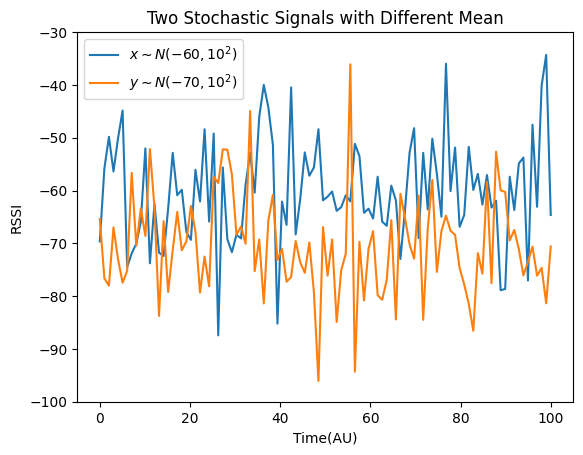

In [2]:
mux    = -60
sigmax = 10
xs     = np.random.normal(loc=mux, scale=sigmax, size=100)

muy    = -70
sigmay = 10
ys     = np.random.normal(loc=muy, scale=sigmay, size=100)

rssis  = np.linspace(0, len(ys), 100)
plt.plot(rssis, xs, label=f"$x \\sim N({mux},{sigmax}^2)$")
plt.plot(rssis, ys, label=f"$y \\sim N({muy},{sigmay}^2)$")
plt.ylim(-100, -30)
plt.legend()
plt.ylabel("RSSI")
plt.xlabel("Time(AU)")
plt.title("Two Stochastic Signals with Different Mean")

Comparison of moving average is a standard approach. 
$$
\begin{align*}
\mu_x = \frac{1}{n} \sum\limits_{i=1}^n x_i \\
\mu_y = \frac{1}{n} \sum\limits_{i=1}^n y_i
\end{align*}
$$
With this approach, we need to identify possible range of $n$ and statistical characteristics of the signals.

## 2. Signal Distributions

Let's say we have following signals souces.

* Source $x$
    * Mean $\mu_x$, Variance $\sigma_x^2$, Normal distribution $N(\mu_x,\sigma_x^2)$
* Source $y$
    * Mean $\mu_y$, Variance $\sigma_y^2$ Normal distribution $N(\mu_y,\sigma_y^2)$

$x$ has higher storength and both have a same variance.
* $\sigma_x = \sigma_y = 20$
* $\mu_x = -60$ and $\mu_y = -70$
* sampling number $n=40$


Prior probability P(x)=0.5, P(y)=0.5


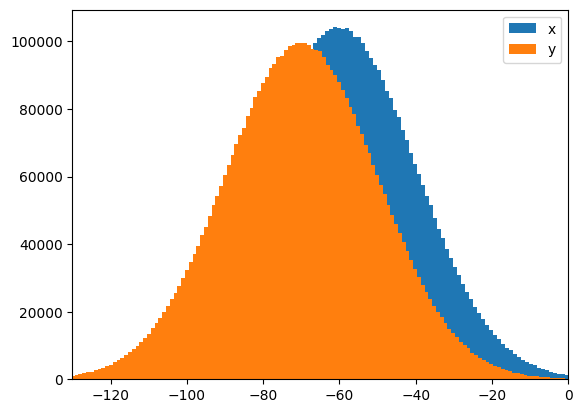

In [3]:
POINTS_X=5000000
POINTS_Y=5000000
mux    = -60
sigmax = 20
xs     = np.random.normal(loc=mux, scale=sigmax, size=POINTS_X)

muy    = -70
sigmay = 20
ys     = np.random.normal(loc=muy, scale=sigmay, size=POINTS_Y)

plt.hist(xs,bins=200, label="x")
plt.hist(ys,bins=200, label="y")
plt.legend()
plt.xlim(-130,-0)

Px = len(xs)/(len(xs) + len(ys))
Py = len(ys)/(len(xs) + len(ys))
print(f"Prior probability P(x)={round(Px,3)}, P(y)={round(Py,3)}")

# 3. Mean Distribution

It is well known that when $n$ is sufficiently large, the distribution of the sample mean follows a normal distribution $N(\mu, \frac{\sigma^2}{n})$ according to the Central Limit Theorem.

Thus, observation of $n$-sample mean $\mu_x$ should follow
$$
\mu_x \sim N(\mu_x, \frac{{\sigma_x}^2}{n})
$$
Similarly, and $n$-sample mean $\mu_y$ should follow
$$
\mu_y \sim N(\mu_y, \frac{{\sigma_y}^2}{n})
$$

サンプリング毎に取得できる値は $n$-サンプル平均値の集合 $[\mu_{x1}, \mu_{x2}, ...]$ と $[\mu_{y1}, \mu_{y2}, ...]$ である。それぞれの平均値は正規分布に従い、その分散は元の分布の分散を $n$ で割ったものに等しい。



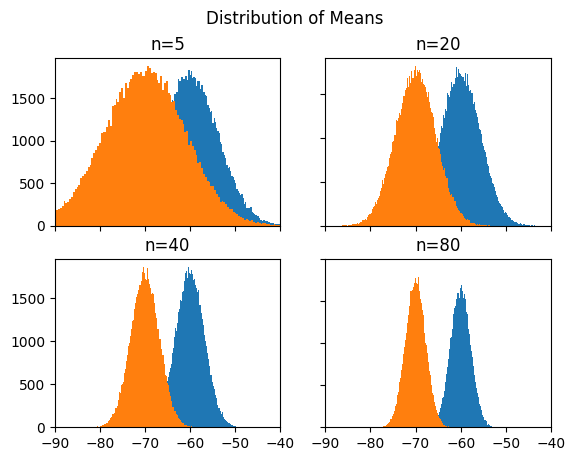

In [4]:
n      = 40
TRIALS = 100000

def computeMeans(mu, sigma, sampling_size, trials):
    means = np.zeros(trials)
    for i in range(trials):
        means[i] = np.random.normal(loc=mu, scale=sigma, size=sampling_size).mean()
    return means

mux_n5  = computeMeans(mux, sigmax, 10, TRIALS)
mux_n20 = computeMeans(mux, sigmax, 20, TRIALS)
mux_n40 = computeMeans(mux, sigmax, 40, TRIALS)
mux_n80 = computeMeans(mux, sigmax, 80, TRIALS)
muy_n5  = computeMeans(muy, sigmay, 5,  TRIALS)
muy_n20 = computeMeans(muy, sigmay, 20, TRIALS)
muy_n40 = computeMeans(muy, sigmay, 40, TRIALS)
muy_n80 = computeMeans(muy, sigmay, 80, TRIALS)

fig, axs = plt.subplots(2,2)
fig.suptitle("Distribution of Means")
axs[0,0].hist(mux_n5, bins=200, label="x")
axs[0,0].hist(muy_n5, bins=200, label="y")
axs[0,0].set_title("n=5")

axs[0,1].hist(mux_n20,bins=200, label="x")
axs[0,1].hist(muy_n20,bins=200, label="y")
axs[0,1].set_title("n=20")
axs[1,0].hist(mux_n40,bins=200, label="x")
axs[1,0].hist(muy_n40,bins=200, label="y")
axs[1,0].set_title("n=40")
axs[1,1].hist(mux_n80,bins=200, label="x")
axs[1,1].hist(muy_n80,bins=200, label="y")
axs[1,1].set_title("n=80")
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim(-90,-40)

In [5]:
count_y_is_bigger_n5  = (mux_n5  <= muy_n5 ).sum()
count_y_is_bigger_n20 = (mux_n20 <= muy_n20).sum()
count_y_is_bigger_n40 = (mux_n40 <= muy_n40).sum()
count_y_is_bigger_n80 = (mux_n80 <= muy_n80).sum()
print(f"For n=5,  {count_y_is_bigger_n5 } times x<=y out of {TRIALS} trials. P(x<=Y)={round(count_y_is_bigger_n5/TRIALS,4)}")
print(f"For n=20, {count_y_is_bigger_n20} times x<=y out of {TRIALS} trials. P(x<=Y)={round(count_y_is_bigger_n20/TRIALS,4)}")
print(f"For n=40, {count_y_is_bigger_n40} times x<=y out of {TRIALS} trials. P(x<=Y)={round(count_y_is_bigger_n40/TRIALS,4)}")
print(f"For n=80, {count_y_is_bigger_n80} times x<=y out of {TRIALS} trials. P(x<=Y)={round(count_y_is_bigger_n80/TRIALS,4)}")


For n=5,  17990 times x<=y out of 100000 trials. P(x<=Y)=0.1799
For n=20, 5606 times x<=y out of 100000 trials. P(x<=Y)=0.0561
For n=40, 1285 times x<=y out of 100000 trials. P(x<=Y)=0.0128
For n=80, 79 times x<=y out of 100000 trials. P(x<=Y)=0.0008


# 4. $\mu_x - \mu_y$ の分布

$\rm P(\mu_x \leq \mu_y)$ は $\rm P(\mu_x - \mu_y \leq 0)$ と等価であるため、 $\rm P(\mu_x - \mu_y \leq 0)$ の分布を求める。

簡単のために $\mu_x - \mu_y = \delta$ と置きかえると、求める分布は $\rm P(\delta \leq 0)$ である。

## 平均
$\delta$  の分布の平均 $\bar{\delta}$ は、
$$
\begin{align*}
\bar{\delta} &= \rm E(\delta) \\
&= \rm E(\mu_x - \mu_y) \\
&= \rm E(\mu_x) - \rm E(\mu_y) \\
&= \bar{\mu_x} - \bar{\mu_y} \\
\end{align*}
$$

## 分散
分散 $\sigma_{\delta}^2$ は、
$$
\begin{align*}
\sigma_{\delta}^2 &= \rm Var(\delta) \\
&= \rm Var(\mu_x - \mu_y) \\
&= \rm Var(\mu_x) + \rm Var(\mu_y) \\
&= \frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{n} \\
&= \frac{\sigma_x^2 + \sigma_y^2}{n}
\end{align*}
$$

## 標準偏差
標本平均を集めたときの標準偏差 $\sigma_{\delta}$は、
$$
\begin{align*}
\sigma_{\delta} &= \sqrt{\rm Var(\mu_x - \mu_y)} \\
&= \sqrt{\frac{\sigma_x^2 + \sigma_y^2}{n}} \\
&= \frac{\sigma_x^2 + \sigma_y^2}{\sqrt{n}}
\end{align*}
$$

## 標準化

標準正規分布に従う 確率変数 $Z$ がある値 $z$ 以下の確率は $P(Z \leq z)$ と表し、累積分布関数(CDF) から求めることができる。
このために、$\rm P(\delta \leq 0)$ を標準化しておく。
$$
\begin{align*}
\delta  \longmapsto Z = \frac{\delta - \bar{\delta}}{\sigma_{\delta}}
\end{align*}
$$

Z の取りうる範囲は、 $\delta \leq 0$ より
$$
Z \leq \frac{-\bar{\delta}}{\sigma_{\delta}}
$$

よって、求める確率は以下となる。
$$
\rm P(\delta \leq 0) \longmapsto \rm P(Z \leq \frac{-\bar{\delta}}{\sigma_{\delta}})
$$


## 確率分布


$\rm P(Z \leq z)$ は 標準正規分布の累積分布関数(CDF) $\Phi(z)$ を用いて表すことができる。
$$
\begin{align*}
P(Z \leq z) &= \rm \Phi(z)
\end{align*}
$$
累積分布関数は次のように与えられる。

$$
\rm \Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-\frac{t^2}{2}} dt
$$
この関数は、誤差関数(ERF) はと次の関係がある。

$$
\rm \Phi(z) = \frac{1}{2}[ 1+\rm{erf} (\frac{z}{\sqrt{2}})]
$$

ここで誤差関数は
$$
\rm erf (x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{- t^2} dt
$$
であるが、 $\rm erf(x)$ は、解析的に解けないため、近似式を求める方法が何種類か知られているが、ここでは $\rm erf(x)$ は残して、最終的に求める式を以下とする。
$$
\begin{align*}
\rm P(Z \leq \frac{-\bar{\delta}}{\sigma_{\delta}}) &= \rm \Phi(\frac{-\bar{\delta}}{\sigma_{\delta}})  \\
&= \frac{1}{2}[ 1+\rm erf (\frac{-\bar{\delta}}{\sqrt{2} \sigma_\delta}) ]
\end{align*}
$$

Text(0, 0.5, '$P(z \\leq \\bar{-\\delta}/\\sigma_\\delta)$')

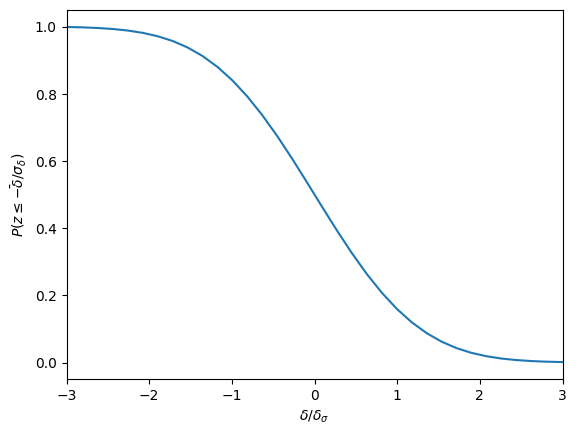

In [6]:
def Ptheo(rssi_delta, rssi_sigma_x, rssi_sigma_y, n):
    sigma_delta = np.sqrt((rssi_sigma_x**2 + rssi_sigma_y**2)/n)
    return 0.5*(1.0 + special.erf(-rssi_delta /(np.sqrt(2.0)*sigma_delta)))

n = 40
rssi_sigma_x = rssi_sigma_y = 10.0
rssi_deltas = np.linspace(-20.0, 20.0, 100)
sigma_delta = np.sqrt((rssi_sigma_x**2 + rssi_sigma_y**2)/n)

pdelta = Ptheo(rssi_deltas, rssi_sigma_x, rssi_sigma_y, n)
plt.plot(rssi_deltas/sigma_delta, pdelta)
plt.xlim(-3,3)
plt.xlabel("$\\delta/\\delta_\\sigma$")
plt.ylabel("$P(z \\leq \\bar{-\\delta}/\\sigma_\\delta)$")

## 5. シミュレーションと理論値の比較

前述した標準正規分布からの確率の求を求め、シミュレーションと一致することを確認する。なお、標準正規分布の累積確率密度の計算は SciPy の組み込み erf 関数を用いた。

Move Distribution y toward distribution x by shifting $\mu_y$ to see chages in $\rm P(\mu_x \leq \mu_y)$ .

Three variances are used.
$$
\sigma_x = \sigma_y = [5,10,20]
$$

In [7]:
SIM_POINTS = 32

def countYisBigger(mux, muy, sigmax, sigmay, sampling_size, trials):
    muxMean  = computeMeans(mux, sigmax, sampling_size, TRIALS)
    muyMean  = computeMeans(muy, sigmay, sampling_size, TRIALS)
    return (muxMean <= muyMean).sum()

sigmas        = np.array([5,10,20])
muys          = np.linspace(mux-10, mux+10, SIM_POINTS)
counts_sigmas = np.zeros([len(sigmas), SIM_POINTS])

for i, sigma_i in enumerate(sigmas):
    for j, muy_i in enumerate(muys):
        counts_sigmas[i][j] = countYisBigger(mux, muy_i, sigma_i, sigma_i, n, TRIALS)

Text(0, 0.5, '$\\rm{P}(\\mu_x \\leq \\mu_y)$')

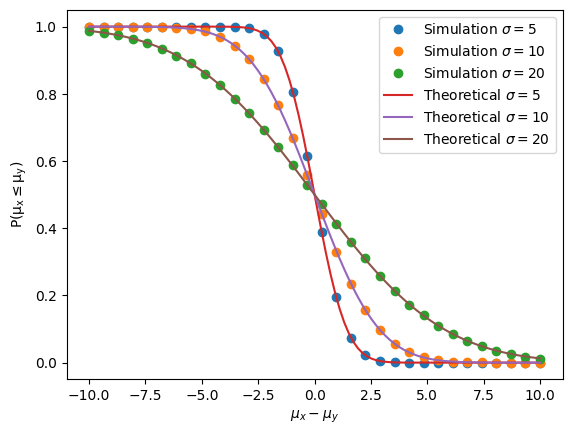

In [8]:
def phi(x):
    return (1.0 + special.erf(-x / np.sqrt(2.0))) / 2.0

xydiff = -60 - muys
deltas = np.linspace(-10, 10, 100)
zss    = np.zeros([len(sigmas), len(deltas)])
for i, sigma_i in enumerate(sigmas):
    sigmadelta  = (sigma_i**2 + sigma_i**2)/n
    zs          = deltas / (np.sqrt(sigmadelta))
    zss[i]      = zs
    plt.plot(xydiff, counts_sigmas[i]/TRIALS, "o", label=f"Simulation $\\sigma={sigma_i}$", )

for i, sigma_i in enumerate(sigmas):
    sim = phi(zss[i])
    plt.plot(deltas, sim,  label=f"Theoretical $\\sigma={sigma_i}$")

plt.legend()
plt.xlabel("$\\mu_x - \\mu_y$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")

# 6. 基準値検討

$$
\begin{align*}
\Phi (z) = p
\end{align*}
$$
とおく。

p の式を erf について解く。
$$

\begin{align*}
p &= \frac{1}{2} [1+ \rm {erf} (\frac{z}{\sqrt 2})] \\
\rm {erf} (\frac{z}{\sqrt 2}) &= 2 p - 1 \\
\rm {erf}^{-1} (2p-1) &= \frac{z}{\sqrt 2} \\
z &= \sqrt{2} \rm erf^{-1} (2p-1)
\end{align*}
$$


$\Phi(z)=p$ の逆関数 $\Phi^{-1}(p)=z$ より
$$
\begin{align*}
\Phi^{-1}(p) &= z \\
&= \sqrt{2} \rm erf^{-1} (2p-1)
\end{align*}
$$


/tmp/ipykernel_76635/4067725053.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


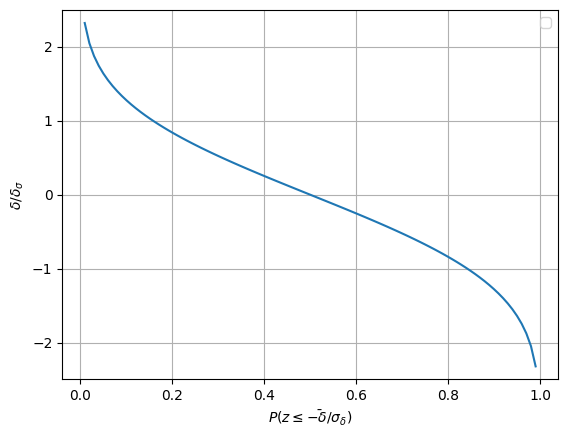

In [9]:
def phi_inv(p):
    return np.sqrt(2.0) * special.erfinv(2*p-1)

p = np.linspace(0,1,100)
# phi_inv が返すのは -σ/δ。軸は σ/δなので-1倍する
plt.plot(p,-phi_inv(p))

plt.legend()
plt.xlabel("$P(z \\leq \\bar{-\\delta}/\\sigma_\\delta)$")
plt.ylabel("$\\delta/\\delta_\\sigma$")
plt.ylim([-2.5,2.5])
plt.grid()

$$
\begin{align*}
n &= \rm ceil[ \frac{\Phi_{inv}^2 (p)(\sigma_x^2 + \sigma_y^2)}{(\mu_x-\mu_y)^2} ] \\
&= \rm ceil[\frac{2(\sigma_x^2 + \sigma_y^2)}{(\mu_x-\mu_y)^2} \rm{erf_{inv}}^{2} (2p-1)]
\end{align*}
$$

In [10]:
print(f"With mu_x={mux}, mu_y={muy}, sigma_x={sigmax}, sigma_y={sigmay}:")
ps=np.array([0.1, 0.01, 0.001, 0.0001])
phi_invs=np.round(phi_inv(ps), 4)
ns = np.ceil(2*(sigmax**2+sigmay**2)*(special.erfinv(2*ps-1))**2/((mux-muy)**2))
for phi_inv_i, p_i, n_i in zip(phi_invs, ps,ns):
    print(f"Phi^-1({p_i})={phi_inv_i} -> n={int(n_i)}")

With mu_x=-60, mu_y=-70, sigma_x=20, sigma_y=20:
Phi^-1(0.1)=-1.2816 -> n=14
Phi^-1(0.01)=-2.3263 -> n=44
Phi^-1(0.001)=-3.0902 -> n=77
Phi^-1(0.0001)=-3.719 -> n=111
